## Exam 2
## Rashid Baishev, 903875892

A bank wants to use performance of an in-house credit product to create a risk model. 
A sample of applicants for the original credit product was selected. 
Credit bureau data describing these individuals (at the time of application) was recorded and stored in the CREDIT data set. 
The ultimate disposition of the loan was determined (paid off or bad debt). For loans rejected at the time of application, a disposition was inferred from credit bureau records on loans obtained in a similar time frame.

### Import data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# adjust the file path to the right directory
credit = pd.read_csv('/Users/rzb0056/Documents/Exam 2_2018/Credit_Exam1.csv').dropna() 
credit.info() 

# get rid of the $ sign in the following columns 
credit['TLSum'] = credit[['TLSum']].replace('[\$,]','',regex=True).astype(float) 
credit['TLMaxSum'] = credit[['TLMaxSum']].replace('[\$,]','',regex=True).astype(float) 
credit['TLBalHCPct'] = credit['TLBalHCPct'].replace('%','',regex=True).astype('float')/100 
credit['TLSatPct'] = credit['TLSatPct'].replace('%','',regex=True).astype('float')/100 
credit['TLOpenPct'] = credit['TLOpenPct'].replace('%','',regex=True).astype('float')/100 
credit['TLOpen24Pct'] = credit['TLOpen24Pct'].replace('%','',regex=True).astype('float')/100 

credit.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2728 entries, 0 to 2999
Data columns (total 30 columns):
TARGET             2728 non-null int64
ID                 2728 non-null int64
DerogCnt           2728 non-null int64
CollectCnt         2728 non-null int64
BanruptcyInd       2728 non-null int64
InqCnt06           2728 non-null int64
InqTimeLast        2728 non-null float64
InqFinanceCnt24    2728 non-null int64
TLTimeFirst        2728 non-null int64
TLTimeLast         2728 non-null int64
TLCnt03            2728 non-null int64
TLCnt12            2728 non-null int64
TLCnt24            2728 non-null int64
TLCnt              2728 non-null float64
TLSum              2728 non-null object
TLMaxSum           2728 non-null object
TLSatCnt           2728 non-null float64
TLDel60Cnt         2728 non-null int64
TLBadCnt24         2728 non-null int64
TL75UtilCnt        2728 non-null float64
TL50UtilCnt        2728 non-null float64
TLBalHCPct         2728 non-null object
TLSatPct           272

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,0,66,1,1,0,7,1.0,4,125,3,...,4.0,0.85,0.67,0,0,1,0.58,0,0,0.71
1,0,116,1,1,0,2,1.0,0,252,18,...,2.0,0.48,0.30,0,1,4,0.40,2,1,0.50
2,0,124,0,0,0,1,1.0,4,254,12,...,3.0,0.84,0.67,0,1,1,0.50,1,1,0.33
3,0,128,0,0,0,6,3.0,6,154,3,...,5.0,0.73,0.76,0,1,1,0.53,1,1,1.22
4,0,143,0,0,0,1,0.0,1,311,17,...,3.0,0.88,0.63,0,0,1,0.63,0,0,0.20


In [2]:
credit['TARGET'].value_counts()

# from the distribution of the dependent variable, we know that when Target = 1, the loan is a defaulted loan. 

0    2257
1     471
Name: TARGET, dtype: int64

### Cross Validation
Randomly split the dataset, so that the training dataset includes 60% of the original dataset. 
Write down the answers for the following questions in your Jupyter notebook.


In [3]:
from sklearn.cross_validation import train_test_split

# define the X and y variables
X = credit.drop(['TARGET', 'ID'], axis=1)
features = X.columns

y = credit["TARGET"]


# Instruction: change the value of random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)

# use the train set to create the models, and use test set to evaluate models. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### 1. Decision Tree

#### Q1 
Create a decision tree model with all variables as the predictors, with the exception of the TARGET and ID variables. Use TARGET as the dependent variable. Set max_depth to 6 in this tree model. (5 points)


In [17]:
# Instruction: define the decision tree model. Fit the model using X_train and y_train

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=6)

clf.fit(X_train,y_train)







DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Q2&Q3
Print out the image of the tree models. Briefly describe the tree according to the image. How many leaves are there in the decision tree? (5-point bonus)

In [7]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus as pdp
from IPython.display import Image

# This function creates images of tree models using pydotplus
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pdp.graph_from_dot_data(dot_data.getvalue())
    return(graph)

ModuleNotFoundError: No module named 'pydotplus'

In [8]:

# Instruction: use the print_tree function
# double click the image to enlarge it

graph = print_tree(clf, features=X.columns)
Image(graph.create_png())



NameError: name 'print_tree' is not defined

#### Your answer for Q3:
##### Instruction: you can either count the leaf nodes, or use python code to get the count of the leaves

The number of leaves: 5




#### Q4
What are the five variables with the highest variable importance in the decision tree model? (3 points)

[('DerogCnt', 0.009227572312729285), ('CollectCnt', 0.0), ('BanruptcyInd', 0.023246188402752301), ('InqCnt06', 0.039408481393818376), ('InqTimeLast', 0.035942691569447405), ('InqFinanceCnt24', 0.045501599315224704), ('TLTimeFirst', 0.061783162304677786), ('TLTimeLast', 0.017542278688291078), ('TLCnt03', 0.0), ('TLCnt12', 0.0), ('TLCnt24', 0.019639978743501697), ('TLCnt', 0.0090898153176818923), ('TLSum', 0.050218349345351895), ('TLMaxSum', 0.047596373356411668), ('TLSatCnt', 0.042764248417452654), ('TLDel60Cnt', 0.016730929401070474), ('TLBadCnt24', 0.0), ('TL75UtilCnt', 0.0408766994815375), ('TL50UtilCnt', 0.0095055497335074894), ('TLBalHCPct', 0.086886580890882276), ('TLSatPct', 0.11355886432228551), ('TLDel3060Cnt24', 0.041011156026400396), ('TLDel90Cnt24', 0.0), ('TLDel60CntAll', 0.009542826399129083), ('TLOpenPct', 0.024660672431433585), ('TLBadDerogCnt', 0.043516626883391626), ('TLDel60Cnt24', 0.17049748582847296), ('TLOpen24Pct', 0.041251869434548546)]


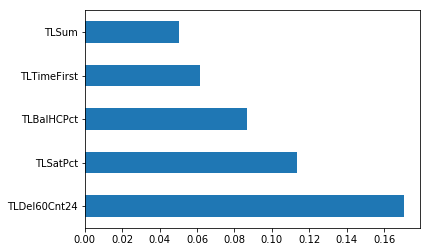

In [9]:
# View a list of the features and their importance scores
print(list(zip(X_train, clf.feature_importances_)))

# plot the important features
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')



#### Your answer for Q4. Use the definition of the variables. 

The five most important variables are: 
TLDel60Cnt24;
TLSatPct;
TLBalHCPct;
TLTimeFirst;
TLSum;








#### Q5
Create a random forest model with the same set of input variables and dependent variable. Set max_features = 4. (5 points)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features = 4)
rfc.fit(X_train, y_train)





RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Q6

What are the five variables with the highest variable importance from the random forest model? (2 points)

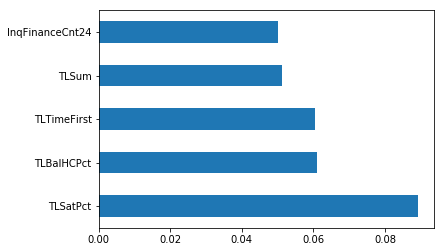

In [11]:
# plot the important features. Run the following code.
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')


#### Your answer for Q4. Use the definition of the variables.
The five most important variables are:
TLSatPct;
TLBalHCPct;
TLTimeFirst;
TLSum;
InqFinanceCnt24;
    
    


#### Q7
Create a neural network model with 3 hidden layers. Each hidden layer should have 5 hidden units. Only use the top five most important variables from the random forest model as the input variables. (5 points)


In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5))
mlp.fit(X_train, y_train)

# Instruction: fill in the names of the five variables

nn_columns = ['TLSatPct','TLBalHCPct','TLSum','TLSum','TLTimeFirst']
mlp.fit(X_train[nn_columns],y_train)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

##### Q8
Create a linear Support Vector Machine model with tuning parameter = 0.1. Only use the top two most important variables from the random forest model as the input variables. (5 points)


In [13]:
# Support Vector Classifier with linear kernel.

from sklearn.svm import SVC


svc = SVC(C= 0.1, kernel='linear')

# Instruction: fill in the names of the two variables

svc_columns = ['TLSatPct','TLBalHCPct']
svc.fit(X_train[svc_columns], y_train)



SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Q9
Print out the support vectors for your model. (5-point bonus)

In [14]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X.values[:, 0].min()-pad, X.values[:, 0].max()+pad
    y_min, y_max = X.values[:, 1].min()-pad, X.values[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X.values[:,0], X.values[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

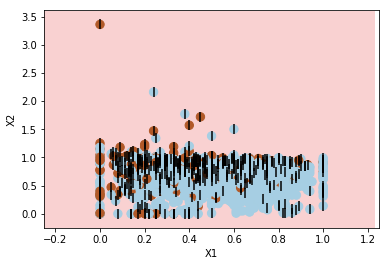

Number of support vectors:  549


In [15]:
# Instruction: run the code below. 

# plot the support vectors
plot_svc(svc, X_train[svc_columns], y_train)



#### Q10
Use the test dataset, compare the accuracy level of the four models you have created in the previous steps, i.e., decision tree, random forest, neural network, SVM. (5 points)


In [16]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

print('Accuracy of Neural Network classifier on test set: {:.2f}'
     .format(mlp.score(X_test[nn_columns], y_test)))

print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svc.score(X_test[svc_columns], y_test)))


Accuracy of Decision Tree classifier on test set: 0.80
Accuracy of Random Forest classifier on test set: 0.82
Accuracy of Neural Network classifier on test set: 0.82
Accuracy of SVM classifier on test set: 0.82


#### Your conclusion: Random Forest, Neural Network and SVM classifiers have the highest accuracy scores amongs all classifiers, therefore we should use either one based on Accuracy score.